In [160]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.cluster import KMeans 
import sklearn
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
print('Libraries imported.')

Libraries imported.


## Q1) K-Means Clustering

K-means clustering is a method which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In this question you will use K-Means clustering for 2 different examples
1. Implementing _k_-means clustering on a randomly generated dataset from scratch.
2. Implementing _k_-means using the SK-Learn library for cluster segmentation and profile building.

### Q1 a) *k*-means on a Randomly Generated Dataset
42 data points belonging to 2 different clusters have been assigned  
x1 is the first feature and x2 the second

In [161]:
x1 = [1.9, -4.1, 2.1, -1.8, -2.3, 3.6, 1.9, 4.6, 1.3, 2.5, -1.6, 3.1, -1.2, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [3.0, -2.9, 2.6, -0.9, -3.1, -1.3, 2.7, 1.4, -0.1, 1.9, -1.3, 3.7, -2.0, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]
x1 = np.array(x1)
x2 = np.array(x2)

In [162]:
centers = [[-1, 1], [1, -1]]
colors_map = np.array(['b', 'r'])

#### Define a function that assigns each datapoint to a cluster
In this first part of Q1 you will have to implement K-Means Clustering from scratch. As you have studied in class that centers are first chosen at random, however here we have initialized the centers for you as `[[-1,-1],[-1,-1]]` for ease in checking which also means we have already chosen the number of clusters to equal 2.

In the first function `assign_members` you will take both features along with the centers as parameters and will assign the colours and class of points to both clusters according to their centers. You will then return colours and class of points to feed into the next function.

Hint: Think of class of points as a boolean array for each cluster

In [163]:
# We can think of the two features x1 and x2 plotted on a 2D plane and thus compute the euclidean distance between
# each point on that plane and the centers and select their clusters based on the closer of the two centroids
def assign_members(x1, x2, centers):
    class_of_points = []
    colours = []
    for i in range(len(x1)):
        c1_dist =  ((x1[i] - centers[0][0])**2 + (x2[i] - centers[0][1])**2)**0.5
        c2_dist =  ((x1[i] - centers[1][0])**2 + (x2[i] - centers[1][1])**2)**0.5
        if c1_dist <= c2_dist:
            class_of_points.append(0)
            colours.append('b')
        else:
            class_of_points.append(1)
            colours.append('r')
    class_of_points = np.array(class_of_points)
    colours = np.array(colours)
    return class_of_points, colours
class_of_points, colours = assign_members(x1, x2, centers)
print(class_of_points)
print(colours)

[0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0
 0 1 0 0 0]
['b' 'b' 'b' 'b' 'r' 'r' 'b' 'r' 'r' 'r' 'b' 'b' 'r' 'r' 'r' 'b' 'b' 'r'
 'r' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'b' 'b'
 'b' 'b' 'r' 'b' 'b' 'b']


#### Define a function that updates the centroid of each cluster

Write a function that updates the center points, `update_centers` in which you will take along with both features and the 'class of points' as parameter and returns the updated centers.

In [164]:
def update_centers(x1, x2, class_of_points):
    c1 = [0, 0]
    c2 = [0, 0]
    count1 = 0
    count2 = 0
    for i in range(len(class_of_points)):
        if class_of_points[i]:
            c2[0] += x1[i]
            c2[1] += x2[i]
            count2 += 1
        else:
            c1[0] += x1[i]
            c1[1] += x2[i]
            count1 += 1
    c1[0] = c1[0]/count1
    c1[1] = c1[1]/count1
    c2[0] = c2[0]/count2
    c2[1] = c2[1]/count2
    return [c1, c2]
print(update_centers(x1, x2, class_of_points))

[[-0.5521739130434782, 0.8065217391304348], [1.3605263157894738, -0.47894736842105273]]


You dont have to implement the `plot_points` function as it has already been implemented for you. All you have to know is it takes centers and an array of colours and a figure title as its parameters. However if you wish to change it then you may do so.

In [165]:
# Dont change this function
def plot_points(centroids=None, colors='g', figure_title=None):
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    ax.set_title(figure_title, fontsize=24)

    plt.show()

#### Initialize data points and centers and plot

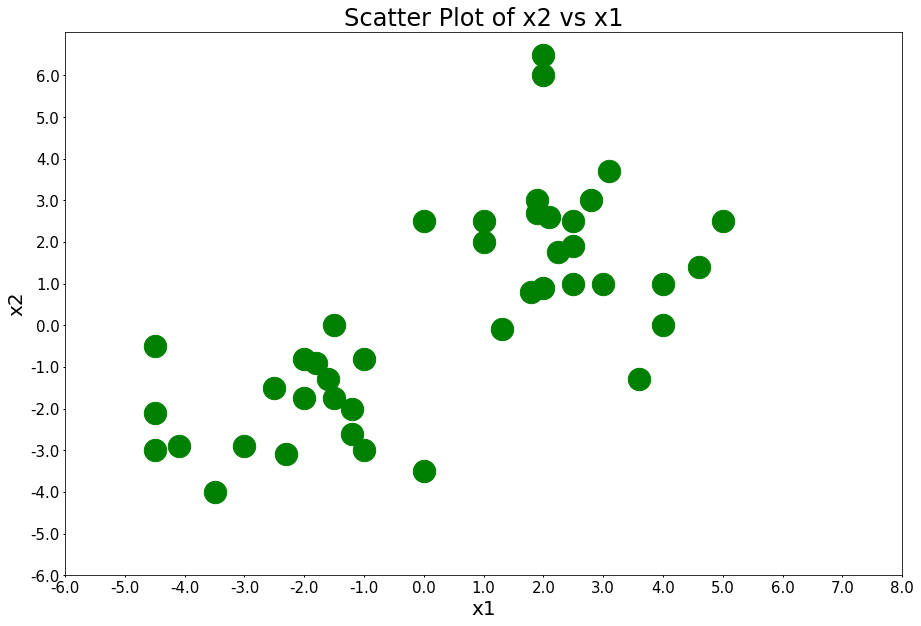

In [166]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

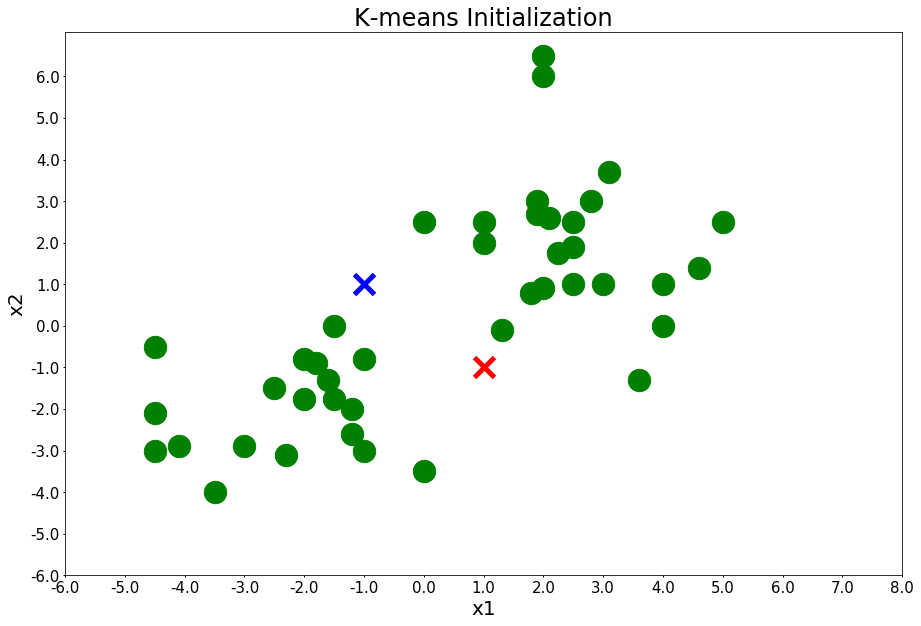

In [167]:
plot_points(centers, figure_title='K-means Initialization')

#### Run the iterations 4 times and plot each cluster assignment and plot each center update
Now use the functions that you have implemented and fill out the for loop  
You have to plot two scatter plot for each iteration, one after the cluster assignment and the second after updating the centers   

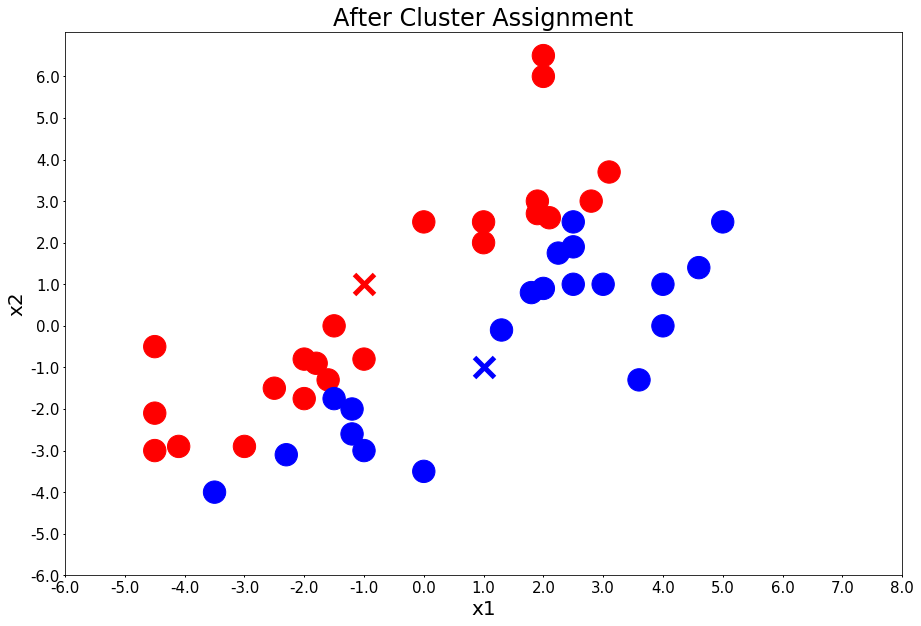

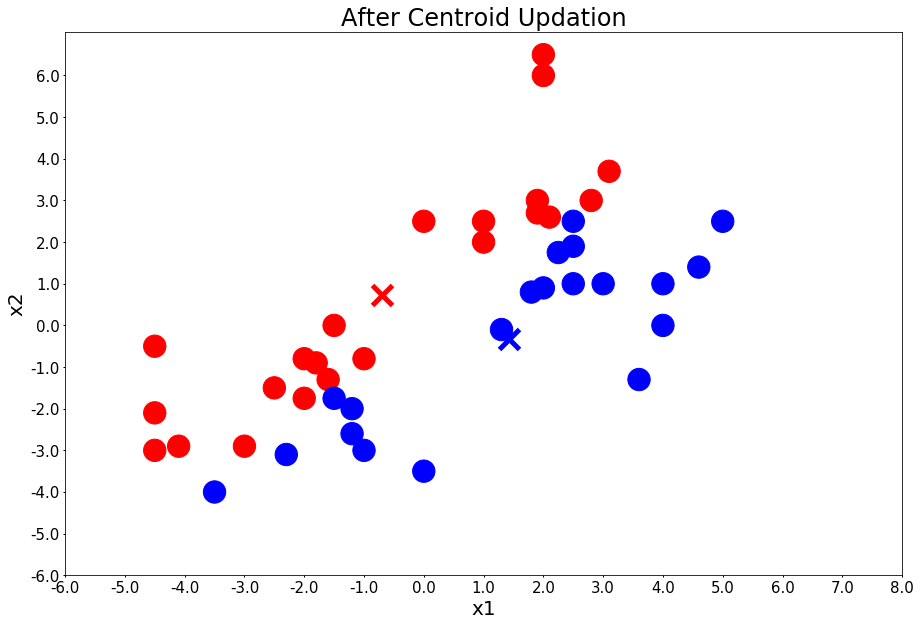

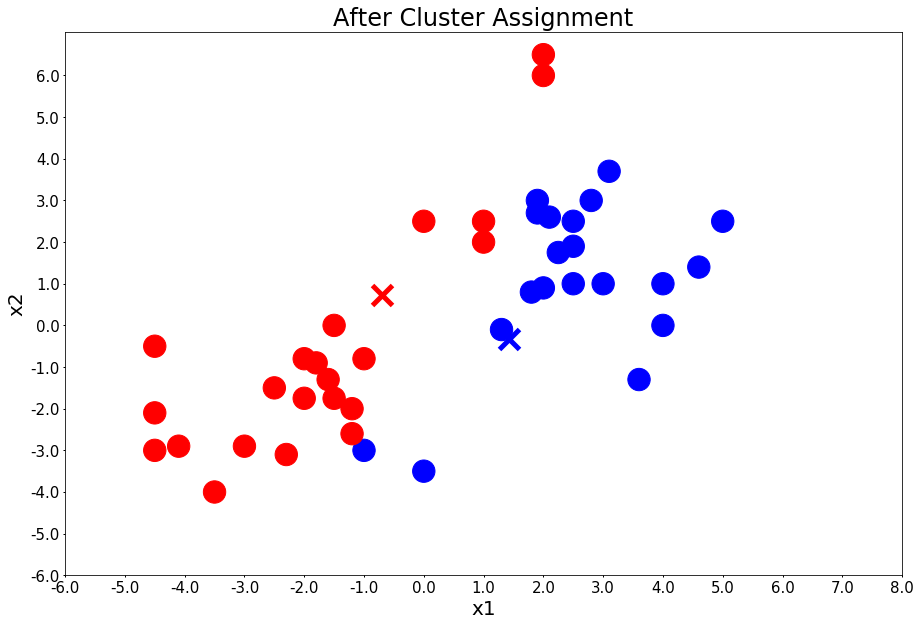

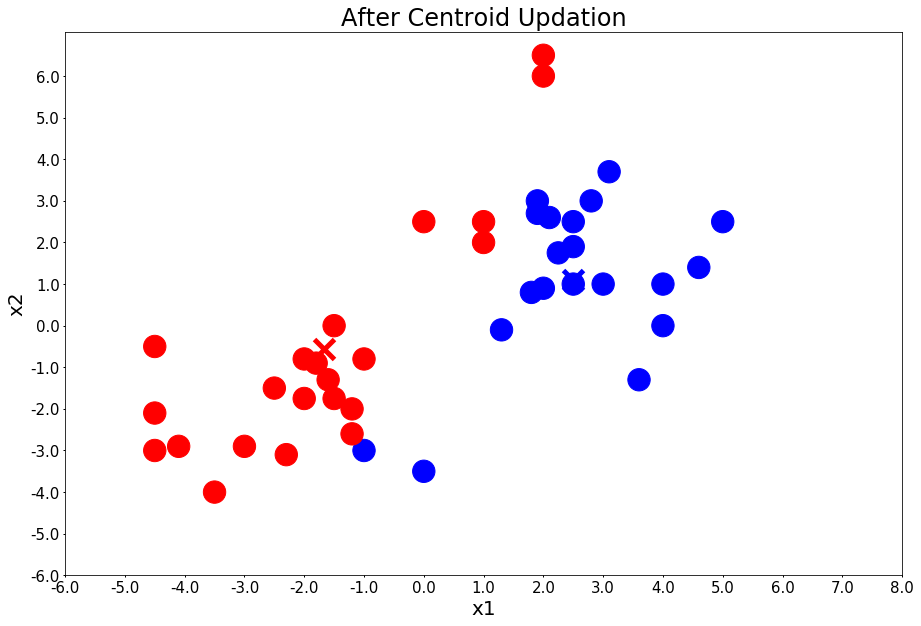

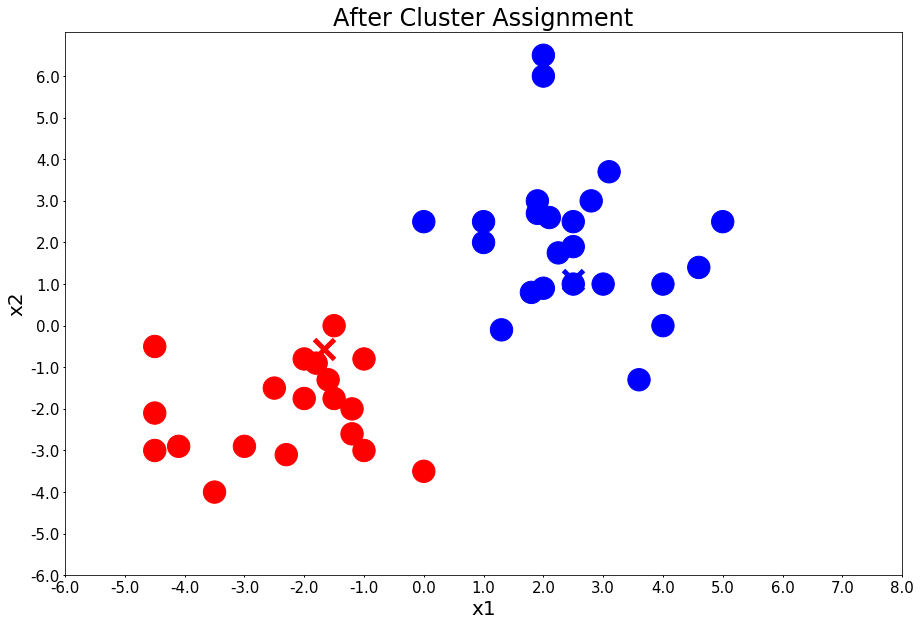

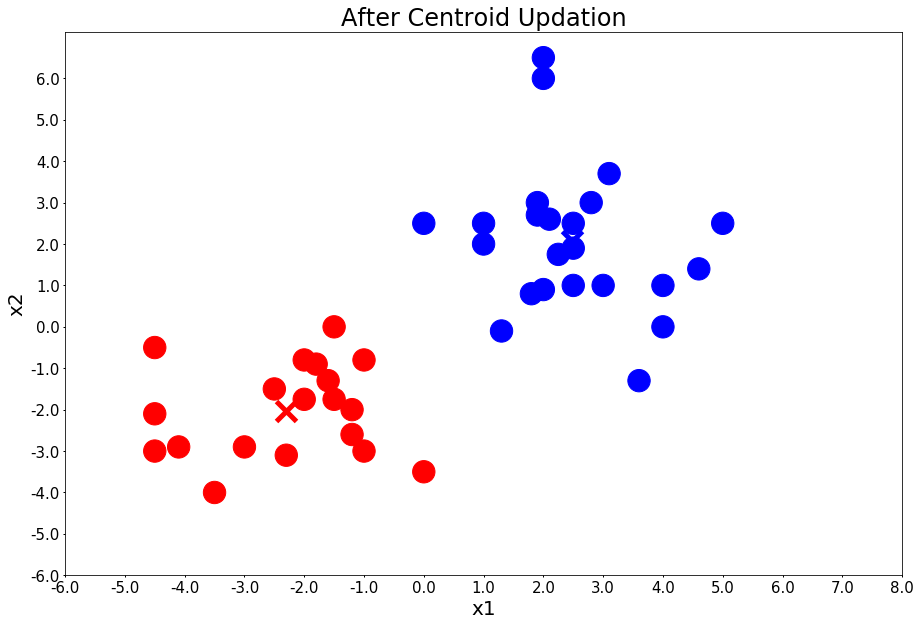

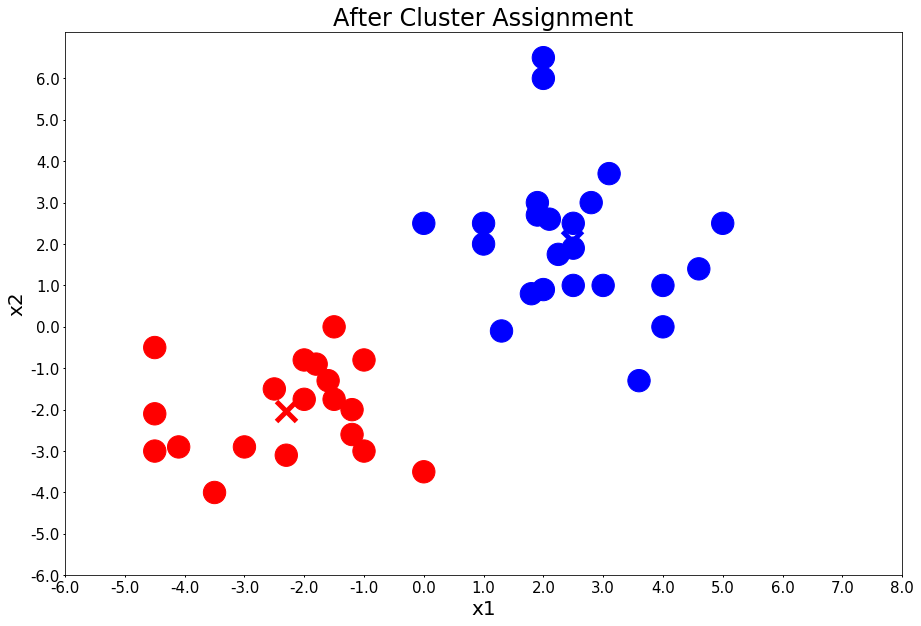

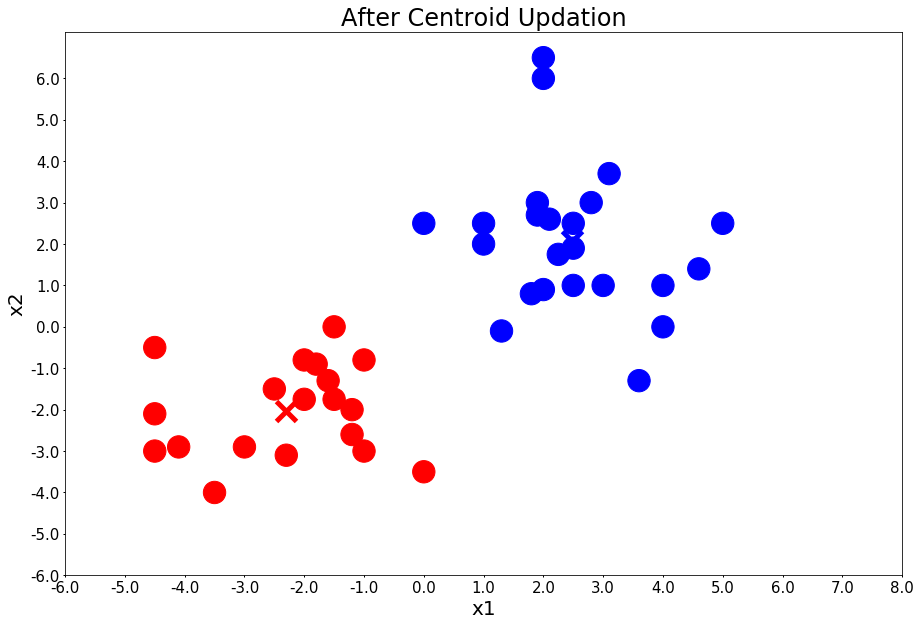

In [168]:
centers = [[1, -1], [-1, 1]]
number_of_iterations = 4
for i in range(0,number_of_iterations):
    class_of_points, colours = assign_members(x1, x2, centers)
    plot_points(centers, colours, figure_title='After Cluster Assignment')
    centers = update_centers(x1, x2, class_of_points)
    plot_points(centers, colours, figure_title='After Centroid Updation')

### Q1 b) *k*-means for Cluster Segmentation and Profile Building

**Step 1)** Read the customer_segemntation csv file into a dataframe and display the first 5 rows

In [169]:
df = pd.read_csv('customer_segmentation.csv')
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


**Step 2)** Drop any columns which will not be of any use (if any) and display the first 5 rows

In [170]:
df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [171]:
df = df.drop(columns=['Address'])
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


**Question:** Explain why you dropped those columns (if any)?

**Answer:** For our purpose, Address is useless since each employee would have a unique address so this column should not be included when clustering. It is also a string so finding its euclidean distance with numerical data won't be possible.

**Step 3)** Check to see if there any NaN entries. Show the count of Nan entries for each column

In [172]:
df.isna().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

**Step 4)** You can either drop these Nan entries or fill in the missing values. Show the first 5 rows and the count of Nan entries for each column after you have either dropped or filled the missing values

In [173]:
df = df.fillna(df['Defaulted'].mode()[0])
df.isna().sum()
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


**Question:** Which method did you use to finish the NaN entries? And why is that method better than the other for K-Means clustering?

**Answer:** Since there were 150 NaN values out of 850 in the Defaulted column, dropping would cause us to lose a significant chunk of our data so instead I simply filled the NaN values with the mode of the remaining data set which was 0.

**Step 5)** Normalize your data and convert it into a numpy array. Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally    
Hint: To Normalize checkout SKLearn library for any inbuilt function

In [174]:
X = sklearn.preprocessing.normalize(df) # Normalized numpy array, used later in the visualization step

**Step 6)** Here you will now use SK Learn's library for K-Means. 
You will use 4 clusters here.
Initailize the `n_init` parameter to equal 12

In [175]:
# Initialize
kmeans = KMeans(n_clusters = 4, n_init = 12)
# Fit
kmeans = kmeans.fit(X)
# Print labels
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1,
       3, 1, 2, 3, 3, 3, 1, 3, 2, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 3, 1, 3, 3, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 3, 3, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       3, 0, 2, 0, 0, 0, 0, 2, 0, 3, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,

**Question:** Here you have been provided with the number of clusters from before. Give two methods where you can find out the optimal number of clusters?  
**Answer:**  Two famous methods used to do so are Elbow method and the Silhouette method.

**Step 7)** Add a column to your original dataframe with these labels and name the column `Labels`

In [176]:
labels = kmeans.labels_
df['Labels'] = kmeans.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


**Step 8)** Visualize your clusters. X is the normalized numpy array. You dont need to implement this, it has already been done for you. The following image shows what the result should more or less look like.
![Visual](Clusters.PNG)

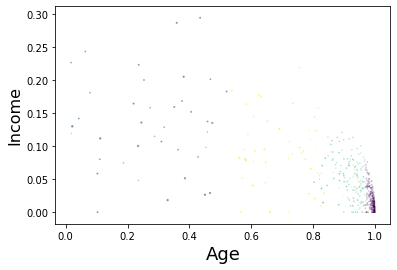

In [177]:
#Do not change this
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

**Step 9)** Here you will do profile building

K-means will partition your customers into four groups since we specified the algorithm to generate 4 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 

Compare all 4 clusters and give main characterstics for each profile/cluster.  
For E.g The group which is older in `age` have a higher `income`

Hint: Use groupby

In [178]:
df['count'] = 1
df.groupby(['Labels']).sum()['count']

Labels
0    610
1     39
2    151
3     50
Name: count, dtype: int64

In [179]:
df.groupby(['Labels']).mean()[['Age', 'Income', 'Edu', 'Years Employed']]

,Age,Income,Edu,Years Employed
Labels,,,,
0,34.159016,38.427869,1.640984,7.534426
1,38.564103,70.692308,2.076923,11.871795
2,36.953642,65.119205,1.887417,11.086093
3,37.080000,72.860000,1.740000,10.960000


In [180]:
df.groupby(['Labels']).median()[['Age', 'Income', 'Edu', 'Years Employed']]

,Age,Income,Edu,Years Employed
Labels,,,,
0,33.0,31.0,1.0,6.0
1,40.0,59.0,2.0,10.0
2,37.0,47.0,2.0,10.0
3,37.0,57.5,1.0,10.5


Characteristics for each cluster  
1. Cluster 2 with a mean and median age of 37.5 and a total of 48 values, has the highest mean and median income.
2. Cluster 1 with highest mean and median education of 2 and a total of 39 values, has the highest mean Years Employed.
3. Cluster 0 with 610 values has the lowest mean and median values for all above attributes.
4. Cluster 3 with 153 values has a mean and median age of about 36 but the mean income is 64.56 compared to a median income of 46

**Question:** Give 2 advantages and 2 disavantages of using K Means Clustering over say a Hierarchal Clustering Method such a Agglomerative Clustering or a Density Based Clustering Method such as DB-Scan?

**Advantages**
1. Kmeans is quite efficient compared to other methods so would fare well on large datasets
2. It is relatively simple to implement

**Disadvantages**
1. In Kmeans, we need to specify k, the number of clusters, in advance and finding the optimal number of clusters is an added task.
2. Kmeans is very sensitive to noisy data and outliers

**Step 10)**
Save your data frame from step, 9 to an Excel or csv file format.

In [181]:
df.to_excel("Q1b.xlsx")

## Q2) Hierarchical  Clustering
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. There are two types of hierarchical clustering algorithms:

*   Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
*   Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

In this question, you will be performing Agglomerative Clustering on a customers shopping habits dataset (in the file customers_shopping.csv) and then labelling the clusters.

**Question** Load the dataset and look for possible missing values. Handle them appropriately. (If any) 

In [182]:
df = pd.read_csv('customers_shopping.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [183]:
# No missing values
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Task** Extract Annual Income and Spending score from the dataset

In [184]:
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Question:** Create an agglomerative cluster using your optimal number of clusters and plot a scatter diagram

In [185]:
# Letting clustering pick optimal cluster number
agg = AgglomerativeClustering()

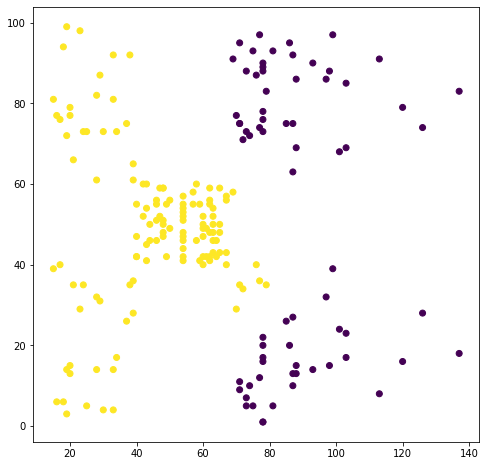

In [186]:
plt.figure(figsize =(8, 8))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = agg.fit_predict(df))

**Question:** What do each of the clusters represent? Discuss.

**Answer:** 

The yellow cluster signifies datapoints with income less than 70 while the purple clusters shows those greater than 70